# Нейронная сеть последовательной модели для классификации на примере MNIST

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import np_utils

Загрузка датасета

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

Создание сети через Sequential

In [4]:
model_seq = keras.Sequential(
    [
        layers.Input(shape=(784,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')        
    ]
)

In [5]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


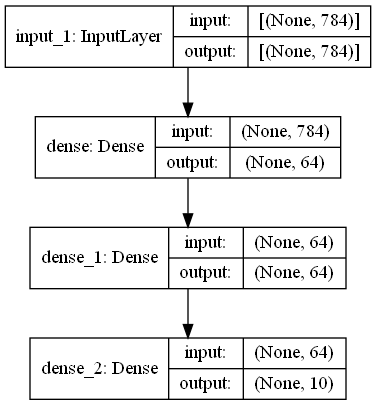

In [6]:
keras.utils.plot_model(model_seq, "model.png", show_shapes=True)

## Обучение и тест

In [7]:
model_seq.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

In [8]:
history = model_seq.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)
test_scores = model_seq.evaluate(x_test, y_test, verbose=2)

print('Test loss: ', test_scores[0])
print('Test accuracy', test_scores[1])

Epoch 1/2


C:\python\lib\site-packages\keras\backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


750/750 [==============================] - 1s 1ms/step - loss: 0.3490 - accuracy: 0.9015 - val_loss: 0.1884 - val_accuracy: 0.9461
Epoch 2/2
750/750 [==============================] - 1s 1ms/step - loss: 0.1652 - accuracy: 0.9517 - val_loss: 0.1300 - val_accuracy: 0.9613
313/313 - 0s - loss: 0.1313 - accuracy: 0.9603
Test loss:  0.13134214282035828
Test accuracy 0.9603000283241272


## Модель через функциональное API

In [10]:
inputs = keras.Input(shape=(784,))

dense = layers.Dense(64, activation="relu")
x = dense(inputs)

x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 1s 1ms/step - loss: 0.3498 - accuracy: 0.9019 - val_loss: 0.1833 - val_accuracy: 0.9477
Epoch 2/2
750/750 [==============================] - 1s 1ms/step - loss: 0.1617 - accuracy: 0.9523 - val_loss: 0.1407 - val_accuracy: 0.9588
313/313 - 0s - loss: 0.1305 - accuracy: 0.9584
Test loss: 0.13048714399337769
Test accuracy: 0.9584000110626221
